In [1]:
import os
import json

In [2]:
filepath = r'C:\Users\aambr\OneDrive\Documents\UNH Fall 2019\Distributed_Scalable\Final\data\logs'

# Look at one log to get an understanding of the setup

In [3]:
logs = dict()

log_explore = os.listdir(filepath)[0]

with open(os.path.join(filepath,log_explore)) as f:
    events = []
    for line in f:
        events.append(json.loads(line))

logs[log_explore] = {'events':events}

In [4]:
for i in logs[log_explore]['events']:
    print(i.keys())

dict_keys(['Event', 'Spark Version'])
dict_keys(['Event', 'Timestamp', 'Executor ID', 'Executor Info'])
dict_keys(['Event', 'Block Manager ID', 'Maximum Memory', 'Timestamp', 'Maximum Onheap Memory', 'Maximum Offheap Memory'])
dict_keys(['Event', 'JVM Information', 'Spark Properties', 'System Properties', 'Classpath Entries'])
dict_keys(['Event', 'App Name', 'App ID', 'Timestamp', 'User'])
dict_keys(['Event', 'Job ID', 'Submission Time', 'Stage Infos', 'Stage IDs', 'Properties'])
dict_keys(['Event', 'Stage Info', 'Properties'])
dict_keys(['Event', 'Stage ID', 'Stage Attempt ID', 'Task Info'])
dict_keys(['Event', 'Stage ID', 'Stage Attempt ID', 'Task Info'])
dict_keys(['Event', 'Stage ID', 'Stage Attempt ID', 'Task Type', 'Task End Reason', 'Task Info', 'Task Metrics'])
dict_keys(['Event', 'Stage ID', 'Stage Attempt ID', 'Task Type', 'Task End Reason', 'Task Info', 'Task Metrics'])
dict_keys(['Event', 'Stage Info'])
dict_keys(['Event', 'Job ID', 'Completion Time', 'Job Result'])
dict_ke

In [5]:
for i in logs[log_explore]['events']:
    print(i['Event'])

SparkListenerLogStart
SparkListenerExecutorAdded
SparkListenerBlockManagerAdded
SparkListenerEnvironmentUpdate
SparkListenerApplicationStart
SparkListenerJobStart
SparkListenerStageSubmitted
SparkListenerTaskStart
SparkListenerTaskStart
SparkListenerTaskEnd
SparkListenerTaskEnd
SparkListenerStageCompleted
SparkListenerJobEnd
SparkListenerJobStart
SparkListenerStageSubmitted
SparkListenerTaskStart
SparkListenerTaskStart
SparkListenerTaskEnd
SparkListenerTaskEnd
SparkListenerStageCompleted
SparkListenerJobEnd
SparkListenerJobStart
SparkListenerStageSubmitted
SparkListenerTaskStart
SparkListenerTaskStart
SparkListenerTaskEnd
SparkListenerTaskEnd
SparkListenerStageCompleted
SparkListenerStageSubmitted
SparkListenerTaskStart
SparkListenerTaskStart
SparkListenerTaskEnd
SparkListenerTaskEnd
SparkListenerStageCompleted
SparkListenerJobEnd
SparkListenerJobStart
SparkListenerStageSubmitted
SparkListenerTaskStart
SparkListenerTaskStart
SparkListenerTaskEnd
SparkListenerTaskEnd
SparkListenerStageC

In [6]:
# Look for app info such as k=? and dist function
for i in logs[log_explore]['events']:
    if i['Event'] == 'SparkListenerApplicationStart':
        app_start = i['Timestamp']
    if i['Event'] == 'SparkListenerApplicationEnd':
        app_stop = i['Timestamp']
    if 'System Properties' in i.keys():
        if ('nonpersistent' in i['System Properties']['sun.java.command']):
            pers = False
        else:
            pers = True
        info = i['System Properties']['sun.java.command'].strip().split(' ')
    
logs[log_explore]['appinfo'] = {'runtime':(app_stop-app_start)/1000,
                                'k':info[-2],
                                'dist_func':info[-3],
                                'persistent':pers}

In [7]:
logs[log_explore]['appinfo']

{'runtime': 18.965, 'k': '5', 'dist_func': 'euclid', 'persistent': False}

# Apply To All Logs

In [8]:
logs = dict()

log_list = os.listdir(filepath)

for log in log_list:
    with open(os.path.join(filepath,log)) as f:
        events = []
        for line in f:
            events.append(json.loads(line))

    logs[log] = {'events':events}

In [9]:
# Get the relevant app info from each log
for log in log_list:
    for i in logs[log]['events']:
        if i['Event'] == 'SparkListenerApplicationStart':
            app_start = i['Timestamp']
        if i['Event'] == 'SparkListenerApplicationEnd':
            app_stop = i['Timestamp']
        if 'System Properties' in i.keys():
            if ('nonpersistent' in i['System Properties']['sun.java.command']):
                pers = False
            else:
                pers = True
            info = i['System Properties']['sun.java.command'].strip().split(' ')
            dataset = info[-5].split('/')[-1][:-4]

    logs[log]['appinfo'] = {'log': log,
                            'dataset':dataset,
                            'runtime':(app_stop-app_start)/1000,
                            'k':info[-2],
                            'dist_func':info[-3],
                            'persistent':pers
                           }

In [10]:
import pandas as pd

In [11]:
app_info_dict = {'log':[],'dataset': [], 'runtime': [], 'k': [], 'dist_func': [], 'persistent': []}
for log in log_list:
    for feature in logs[log]['appinfo'].keys():
        app_info_dict[feature].append(logs[log]['appinfo'][feature])

In [12]:
# app_info_dict

In [13]:
df = pd.DataFrame(app_info_dict)

In [14]:
df[df['dataset'] == 'mobilenet']

,log,dataset,runtime,k,dist_func,persistent
0,local-1588874985623,mobilenet,18.965,5,euclid,False
3,local-1588876143825,mobilenet,18.878,5,circle,False
10,local-1588877112168,mobilenet,19.026,5,circle,True
11,local-1588877134113,mobilenet,11.683,5,euclid,True


In [15]:
df[df['dataset'] == 'dbpedia']

,log,dataset,runtime,k,dist_func,persistent
6,local-1588876243975,dbpedia,434.347,6,circle,False
7,local-1588876682179,dbpedia,139.381,6,euclid,False
16,local-1588877208262,dbpedia,114.309,6,circle,True
17,local-1588877325903,dbpedia,38.190,6,euclid,True


In [16]:
df[df['dataset'] == 'dbpedia_sample']

,log,dataset,runtime,k,dist_func,persistent
8,local-1588876824644,dbpedia_sample,52.355,6,circle,False
9,local-1588876879536,dbpedia_sample,64.481,6,euclid,False
18,local-1588877366726,dbpedia_sample,122.390,6,circle,True
19,local-1588877492198,dbpedia_sample,16.783,6,euclid,True


In [17]:
df[df['dataset'] == 'synthetic']

,log,dataset,runtime,k,dist_func,persistent
1,local-1588875335336,synthetic,15.710,2,circle,False
2,local-1588875354139,synthetic,15.655,2,euclid,False
4,local-1588876211383,synthetic,13.359,4,circle,False
5,local-1588876227623,synthetic,13.193,4,euclid,False
12,local-1588877149349,synthetic,9.182,2,circle,True
13,local-1588877161652,synthetic,12.054,2,euclid,True
14,local-1588877176699,synthetic,14.954,4,circle,True
15,local-1588877194664,synthetic,10.699,4,euclid,True


In [18]:
pers_df = pd.DataFrame(df.groupby('persistent')['runtime'].mean())

In [19]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'RDD Cache Status vs Runtime')

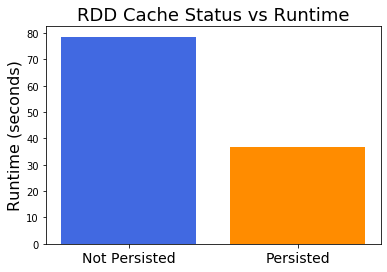

In [20]:
fig, ax = plt.subplots()
ax.bar([str(i) for i in pers_df.index.values],pers_df.values[:,0], color=['royalblue','darkorange'])
ax.set_ylabel('Runtime (seconds)', fontsize=16)
ax.tick_params(axis='x',labelsize=14)
ax.set_xticklabels(['Not Persisted','Persisted'])
ax.set_title('RDD Cache Status vs Runtime', fontsize=18)

In [21]:
df.groupby('k')['runtime'].mean()

k
2     13.15025
4     13.05125
5     17.13800
6    122.77950
Name: runtime, dtype: float64

In [22]:
rt_by_dist = pd.DataFrame(df.groupby(['dataset','dist_func'])['runtime'].mean())

In [23]:
rt_by_dist.xs('circle', level=1)

,runtime
dataset,
dbpedia,274.32800
dbpedia_sample,87.37250
mobilenet,18.95200
synthetic,13.30125


In [24]:
[i[0] for i in rt_by_dist.xs('circle', level=1).values]

[274.328, 87.3725, 18.951999999999998, 13.301250000000001]

In [25]:
rt_by_dist.loc[(slice(None), 'circle'), :]

,,runtime
dataset,dist_func,
dbpedia,circle,274.32800
dbpedia_sample,circle,87.37250
mobilenet,circle,18.95200
synthetic,circle,13.30125


In [26]:
rt_by_dist.index.levels[1].values[0]

'circle'

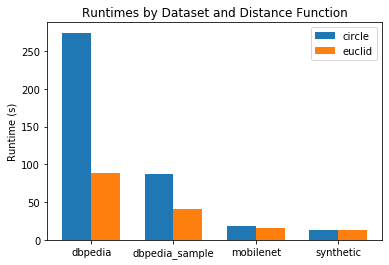

In [27]:
labels = rt_by_dist.index.levels[0].values
circle = [i[0] for i in rt_by_dist.xs('circle', level=1).values]
euclid = [i[0] for i in rt_by_dist.xs('euclid', level=1).values]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, circle, width, label=rt_by_dist.index.levels[1].values[0])
rects2 = ax.bar(x + width/2, euclid, width, label=rt_by_dist.index.levels[1].values[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (s)')
ax.set_title('Runtimes by Dataset and Distance Function')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [28]:
rt_by_pers = pd.DataFrame(df.groupby(['dataset','persistent'])['runtime'].mean())

In [29]:
rt_by_pers

runtime
dataset        persistent           
dbpedia        False       286.86400
               True         76.24950
dbpedia_sample False        58.41800
               True         69.58650
mobilenet      False        18.92150
               True         15.35450
synthetic      False        14.47925
               True         11.72225

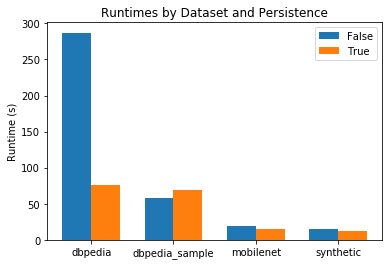

In [31]:
to_plot = rt_by_pers

labels = to_plot.index.levels[0].values
vs = to_plot.index.levels[1].values
circle = [i[0] for i in to_plot.xs(vs[0], level=1).values]
euclid = [i[0] for i in to_plot.xs(vs[1], level=1).values]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, circle, width, label=to_plot.index.levels[1].values[0])
rects2 = ax.bar(x + width/2, euclid, width, label=to_plot.index.levels[1].values[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (s)')
ax.set_title('Runtimes by Dataset and Persistence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()